# Реализация градиентного спуска на PyTorch

In [1]:
import torch

In [2]:
x = torch.tensor(
    [[1.,   2.,  3.,   4.],
     [5.,   6.,  7.,   8.],
     [9.,  10.,  11.,  12.]], requires_grad=True)

# Чтобы указать, что по этому тензору впоследствие будем считать производные - 
# указываем аргумент requires_grad=True

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)

# Считаем производную у этой функции
function = 10 * (x ** 2).sum()
function.backward() # когда вычисляем производную, мы идём с конца: вычисляем последнюю операцию, потом предпоследнюю,
# предпредпоследнюю итд., пока не дойдем до аргумента x --> называеся backward

print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


In [4]:
# Мы взяли градиент, который хранится в переменной x, домножили его на градиентный шаг
x.data -= 0.001 * x.grad

# Если мы делаем один градиентный шаг, потом второй градиентный шаг, потом третий, ..., энный, то
# градиенты по умолчанию накапливаются (суммируются).
# В x.data будет сумма предыдущего градиента и текущего.
# Чтобы такого не происходило в данной задаче, будем обнулять градиент.
x.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### Задание

Реализуйте градиентный спуск для функции: $f(w) = \prod_{i, j}log_{e}(log_{e}(w_{i,j}+7))$.

Пусть начальным приближением будет $w^{t=0} = [[5, 10], [1, 2]]$, шаг градиентного спуска $\alpha=0,001$.

Чему будет равен $w^{t=500}$?

In [6]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -= 0.001 * w.grad # put our code here
    w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


Задание завершено.

Сделаем функции для градиентного спуска, чтобы вызывать их сколько угодно раз, тем самым делая градиентный спуск любой длины.

In [7]:
import torch

In [11]:
# Начальная точка приближения
x = torch.tensor([8., 8.], requires_grad=True)

# Функцию, которую мы будем передавать в цикл для градиентного спуска
def function_parabola(variable):
    return 10*(variable**2).sum()


def make_gradient_step(function, variable):
    """
    Эта функция будет делать градиентный шаг.
    На вход первым аргументом получает функцию, которую мы хотим оптимизировать (функцию потерь).
    Вторым аргументом она получает переменную - предыдущее состояние, в котором она находилась, 
    то есть ту переменную, по которой мы хотим делать градиентные шаги.
    
    Внутри:
    1) Она будет считать значение функции в предыдущем положении;
    2) Она будет вычислять производную и делать backward;
    3) Далее будем делать градиентный шаг, то есть домножать размер градиента на learning rate.
    4) Вычитать получившееся значения из предыдущего значения переменной и...
    5) ...обнулять градиент (потому что в PyTorch по умолчанию градиенты накапливаются)
    """
    
    function_result = function(variable)
    function_result.backward()
    variable.data -= 0.001 * variable.grad   # градиентный шаг = 0,001
    variable.grad.zero_()
    
# Будем делать 500 градиентных шагов
for i in range(500):
    make_gradient_step(function_parabola, x)

Что нужно изменить в коде в ячейке выше, чтобы применять любые вариации градиентных спусков, реализованных в PyTorch?

Например, в коде ниже можно поменять SGD на RMSProp или Adam или что угодно другое с другими параметрами и посмотреть, как изменится наша сходимость.

In [24]:
# Начальная точка приближения
x = torch.tensor([8., 8.], requires_grad=True)

var_history = [] # Чтобы запомнить ход движения переменной x при градиентном спуске (и нарисовать потом сходимость на линиях уровня)
fn_history = [] # Чтобы запомнить значения функции потерь при градиентном спуске и посмотреть на график функции потерь на каждой итерации

# 1. Некий optimizer, который знает, как нам делать градиентные шаги
optimizer = torch.optim.SGD([x], lr=0.001)   # Тут SGD. Для него: та переменная x, внутри которой будут считаться градиенты

# Функцию, которую мы будем передавать в цикл для градиентного спуска
def function_parabola(variable):
    return 10*(variable**2).sum()


def make_gradient_step(function, variable):
    """
    Эта функция будет делать градиентный шаг.
    На вход первым аргументом получает функцию, которую мы хотим оптимизировать (функцию потерь).
    Вторым аргументом она получает переменную - предыдущее состояние, в котором она находилась, 
    то есть ту переменную, по которой мы хотим делать градиентные шаги.
    
    Внутри:
    1) Она будет считать значение функции в предыдущем положении;
    2) Она будет вычислять производную и делать backward;
    3) Далее будем делать градиентный шаг, то есть домножать размер градиента на learning rate.
    4) Вычитать получившееся значения из предыдущего значения переменной и...
    5) ...обнулять градиент (потому что в PyTorch по умолчанию градиенты накапливаются)
    """
    
    function_result = function(variable)
    function_result.backward()
    optimizer.step()   # optimizer сам сделает градиентный шаг, и значение x из
    optimizer.zero_grad()
    
# Будем делать 500 градиентных шагов
for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

Если хотим визуализировать то, что у нас получается в ходе градиентного спуска, мы можем попробовать нарисовать график линий уровня:

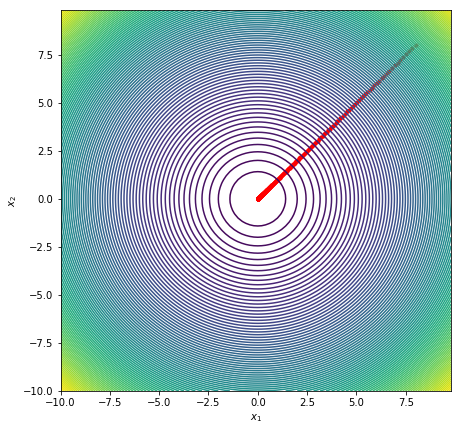

In [25]:
import matplotlib.pyplot as plt
import numpy as np


def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')


show_contours(function_parabola)
# Круги - линии, на которых функция имеет одно и то же значение. 
# Красные точки - траектория движения переменной x, которую x проходит в процессе градиентного спуска
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r')

Посмотреть, как быстро уменьшается функция потерь для нашей функции:

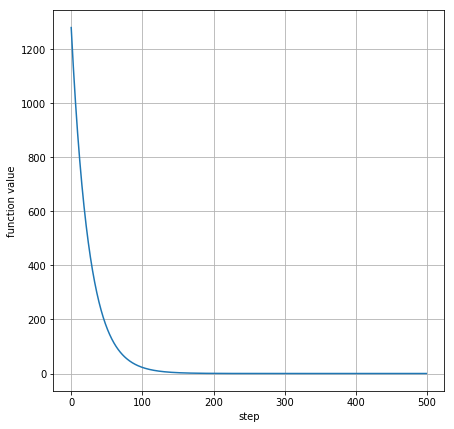

In [27]:
plt.figure(figsize=(7,7))
plt.plot(fn_history)
plt.grid()
plt.xlabel('step')
plt.ylabel('function value');